In [35]:
import kagglehub
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = kagglehub.dataset_download("atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024")
lifestyle_df = pd.read_csv(path+'/Mental_Health_Lifestyle_Dataset.csv')

lifestyle_df.head()

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


In [7]:
lifestyle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      2405 non-null   object 
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 281.4+ KB


In [6]:
numarical_column = lifestyle_df.select_dtypes(include = 'number' ).columns.to_list()
catgorical_column = lifestyle_df.select_dtypes(include = 'object' ).columns.to_list()
print(f"numarical_column : {numarical_column}")
print(f"ctagorical_column : {catgorical_column}")

numarical_column : ['Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']
ctagorical_column : ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Stress Level', 'Mental Health Condition']


In [7]:
lifestyle_df[catgorical_column] = lifestyle_df[catgorical_column].astype('category')

In [10]:
lifestyle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Country                      3000 non-null   category
 1   Age                          3000 non-null   int64   
 2   Gender                       3000 non-null   category
 3   Exercise Level               3000 non-null   category
 4   Diet Type                    3000 non-null   category
 5   Sleep Hours                  3000 non-null   float64 
 6   Stress Level                 3000 non-null   category
 7   Mental Health Condition      2405 non-null   category
 8   Work Hours per Week          3000 non-null   int64   
 9   Screen Time per Day (Hours)  3000 non-null   float64 
 10  Social Interaction Score     3000 non-null   float64 
 11  Happiness Score              3000 non-null   float64 
dtypes: category(6), float64(4), int64(2)
memory usage: 159.5 KB


In [19]:
lifestyle_df.isna().sum()
# lifestyle_df.duplicated().sum()

Country                          0
Age                              0
Gender                           0
Exercise Level                   0
Diet Type                        0
Sleep Hours                      0
Stress Level                     0
Mental Health Condition        595
Work Hours per Week              0
Screen Time per Day (Hours)      0
Social Interaction Score         0
Happiness Score                  0
dtype: int64

In [ ]:
lifestyle_df = lifestyle_df.dropna()
lifestyle_df.isna().sum()

Country                        0
Age                            0
Gender                         0
Exercise Level                 0
Diet Type                      0
Sleep Hours                    0
Stress Level                   0
Mental Health Condition        0
Work Hours per Week            0
Screen Time per Day (Hours)    0
Social Interaction Score       0
Happiness Score                0
dtype: int64

In [40]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('cat', categorical_pipeline, catgorical_column),
    ('num', numerical_pipeline, numarical_column)
])

X = preprocessor.fit_transform(lifestyle_df)

pca = PCA(n_components=.9) 
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components:", pca.n_components_)

Explained variance ratio: [0.10166051 0.10119082 0.09823807 0.09532592 0.09371056 0.0894162
 0.03380005 0.03342835 0.03257648 0.03228454 0.03134669 0.03050618
 0.03007781 0.02025006 0.01963072 0.01950122 0.01874462 0.01852653]
Number of components: 18


In [41]:
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
ohe_feature_names = ohe.get_feature_names_out(catgorical_column)
all_feature_names = list(ohe_feature_names) + numarical_column

pca_df = pd.DataFrame(pca.components_, columns=all_feature_names, index=[f'PC{i+1}' for i in range(pca.n_components_)])

for pc in pca_df.index:
    top_features = pca_df.loc[pc].abs().nlargest(3)
    print(f"{pc} top features:")
    print(top_features)
    print()

PC1 top features:
Social Interaction Score    0.734438
Happiness Score             0.482588
Age                         0.422345
Name: PC1, dtype: float64

PC2 top features:
Sleep Hours                    0.559284
Age                            0.513113
Screen Time per Day (Hours)    0.453633
Name: PC2, dtype: float64

PC3 top features:
Work Hours per Week            0.785092
Screen Time per Day (Hours)    0.543070
Happiness Score                0.267911
Name: PC3, dtype: float64

PC4 top features:
Age                0.542158
Sleep Hours        0.525223
Happiness Score    0.457074
Name: PC4, dtype: float64

PC5 top features:
Sleep Hours                    0.602419
Screen Time per Day (Hours)    0.568832
Work Hours per Week            0.404284
Name: PC5, dtype: float64

PC6 top features:
Social Interaction Score    0.621989
Happiness Score             0.473853
Age                         0.472790
Name: PC6, dtype: float64

PC7 top features:
Gender_Female            0.504323
Stress Level

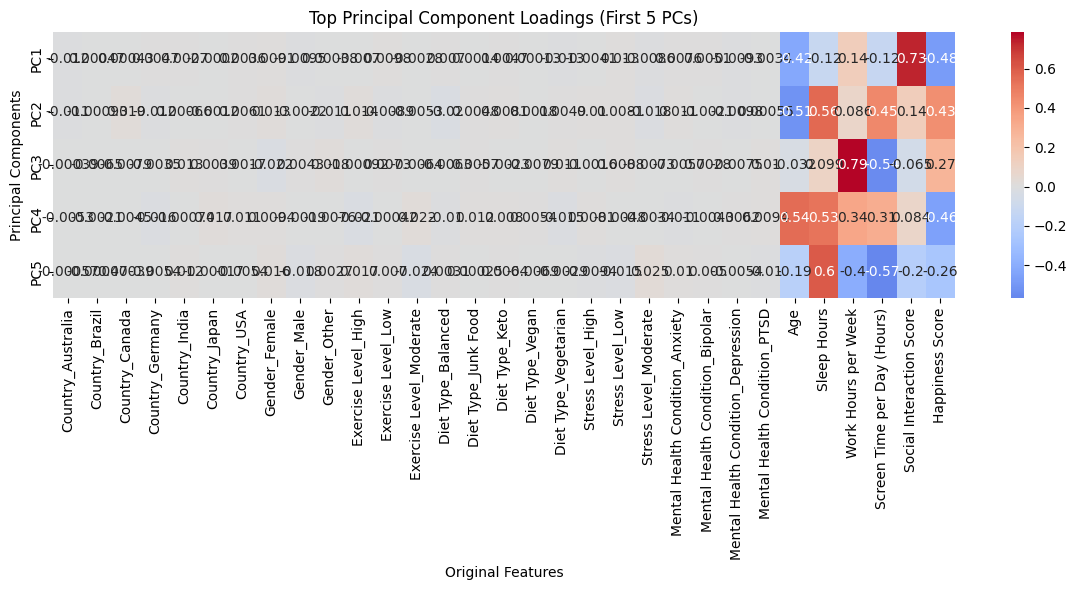

In [42]:
loading_df = pd.DataFrame(
    pca.components_[:5],  # Top 5 PCs
    columns=all_feature_names,
    index=[f'PC{i+1}' for i in range(5)]
)

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(loading_df, annot=True, cmap='coolwarm', center=0)
plt.title("Top Principal Component Loadings (First 5 PCs)")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.tight_layout()
plt.show()